In [750]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import string

## Get the Data

**Get data**

In [751]:
df1 = pd.read_csv('/Users/dougmengistu/Documents/tweet1.csv')
df2 = pd.read_csv('/Users/dougmengistu/Documents/tweet2.csv')
df3 = pd.read_csv('/Users/dougmengistu/Documents/tweet3.csv')
df4 = pd.read_csv('/Users/dougmengistu/Documents/tweet4.csv')
df5 = pd.read_csv('/Users/dougmengistu/Documents/tweet5.csv')
df6 = pd.read_csv('/Users/dougmengistu/Documents/tweet6.csv')
df7 = pd.read_csv('/Users/dougmengistu/Documents/tweet7.csv')
df8 = pd.read_csv('/Users/dougmengistu/Documents/tweet8.csv')
df9 = pd.read_csv('/Users/dougmengistu/Documents/tweet9.csv')

**Concatinate the dataframes**

In [752]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [753]:
result = pd.concat(frames)

In [754]:
result = result.drop(labels='sentiment (S)', axis=1)

In [755]:
len(result.index)

846

**DATA**

In [756]:
result.head()

,id (S),company (S),content (S),createdAt (S),keyword (S),tweetId (N),user (S),userId (N)
0,cf842bca-b58e-4686-95e3-43f6f63c0a49,AIGInsurance,@aigkenham @AiG God says you don't need to wor...,not,AIG,8.99687e+17,AidanStreet,4.807950e+07
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99641e+17,Bar3lyL0gical,4.124504e+09


**Filter dataset**

In [757]:
result_clean = result[(result['createdAt (S)'] != 'not') | (result['createdAt (S)'] == 'nan')]

In [758]:
result_clean.rename(index=str, columns={"content (S)": "tweets", "createdAt (S)":"sentiments"}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [759]:
len(result_clean.index)

516

In [760]:
result_clean.head()

,id (S),company (S),tweets,sentiments,keyword (S),tweetId (N),user (S),userId (N)
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99641e+17,Bar3lyL0gical,4.124504e+09
6,c57fa40d-b8db-42e0-8294-c74bdd7bbd32,GEICO,Join the GEICO team! See our latest #job openi...,neutral,GEICO,8.99647e+17,GEICO_Jobs,2.013487e+08


In [761]:
result_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 1 to 40
Data columns (total 8 columns):
id (S)         511 non-null object
company (S)    511 non-null object
tweets         511 non-null object
sentiments     511 non-null object
keyword (S)    511 non-null object
tweetId (N)    511 non-null object
user (S)       511 non-null object
userId (N)     511 non-null float64
dtypes: float64(1), object(7)
memory usage: 36.3+ KB


In [762]:
result_clean.columns

Index(['id (S)', 'company (S)', 'tweets', 'sentiments', 'keyword (S)',
       'tweetId (N)', 'user (S)', 'userId (N)'],
      dtype='object')

## Data Analysis

**Add tweet length for analysis**

In [763]:
result_clean['tweet_length'] = result_clean['tweets'].apply(str).apply(len)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Tweets per company**

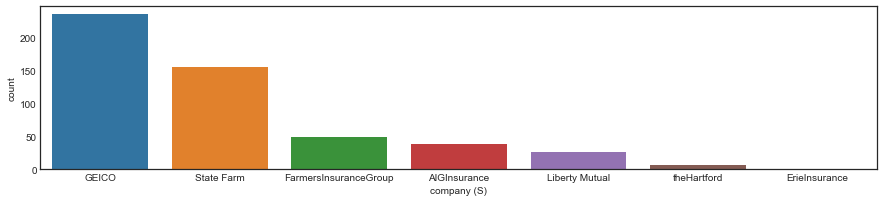

In [764]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,3))
sns.countplot(x='company (S)',data=result_clean)

**Tweet length per sentiment**

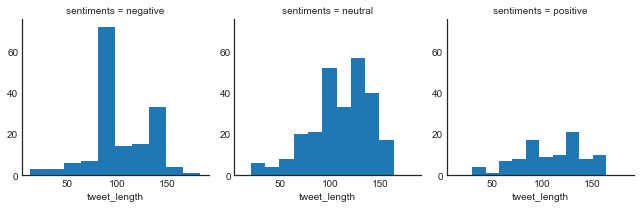

In [765]:
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(result_clean,col='sentiments')
g.map(plt.hist,'tweet_length')

**Sentiment per Company**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11719cf60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11743e0b8>]], dtype=object)

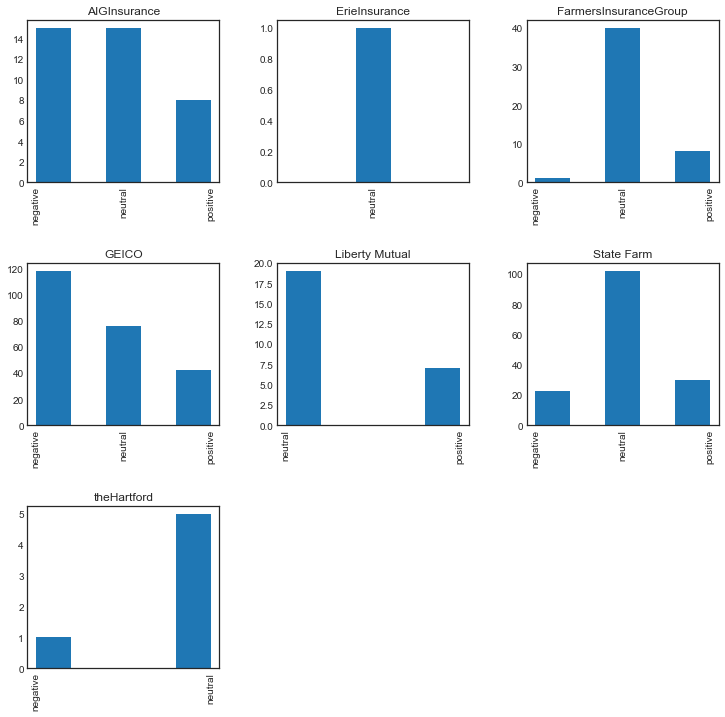

In [766]:
result_clean.hist(column='sentiments', by='company (S)', bins=5, figsize=(12,12))

**Functions to provide data analysis**

In [803]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = ' '.join([c for c in nopunc.split() if c.lower() not in stopwords.words('english') ])
    return nostop

In [804]:
def removeit(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = [c for c in nopunc.split() if c.lower() not in stopwords.words('english') 
                       and not c.startswith('@') and c != 'RT' and  c.lower() != 'n' and 
                       c.lower() != 'koreas' and c.lower() != '1st' and c.lower() != 'target' and 
                       c.lower() != 'b' and c.lower() != 'dude' and c.lower() != 'makin' and 
                       c.lower() != 'tha' and c.lower() != 'geico' and c.lower() != 'soundcloud' and 
                       c.lower() != 'ads' and c.lower() !='killmefam' and c.lower()!='rt' and 
                       c.lower() != 'statefarm' and c.lower() != 'aig']
#     words = ''.join([word for word in nostop if 'RT' not in word and not word.startswith('@') and word != 'RT' and word !='N Koreas 1st Target should b the dude makin tha geico soundcloud ads' ])
    return nostop

** Count words per sentiment**

In [805]:
from collections import Counter
results_negative = result_clean[result_clean['sentiments']=='negative']
results_neutral = result_clean[result_clean['sentiments']=='neutral']
results_positive = result_clean[result_clean['sentiments']=='positive']
# words = [word for word in results_negative['tweets'].apply(str) if 'RT' not in word  and not word.startswith('@') and word != 'RT' ]
# results_negative['tweets'].apply(str)
results_negative['tweets'].apply(text_process)
results_neutral['tweets'].apply(text_process)
results_positive['tweets'].apply(text_process).head()


12    Well eclipse Back connecting StateFarm agents ...
25    Customer Engagement Linchpin Success FarmersIn...
34    AdamIsMyAgent GoodNeighbor mattnafziger☎️adami...
39    Geico 15 minutes could save 15 car insurance h...
41    VOTE Bocas NEEDIEST children need vote StateFa...
Name: tweets, dtype: object

       words  count
0         RT     76
1      geico     73
2        ads     63
3          b     63
4  killmefam     62


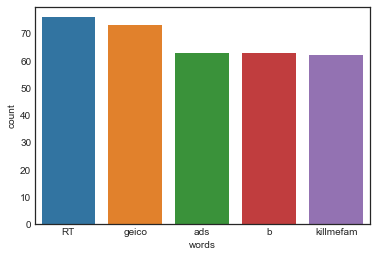

In [806]:
neg_words = Counter(" ".join(results_negative['tweets'].apply(text_process)).split()).most_common(5)
neg_words = pd.DataFrame.from_records(neg_words, columns=['words','count' ])
print(neg_words.head())
sns.barplot(x='words',y='count',data=neg_words)

       words  count
0         RT     84
1  StateFarm     67
2  Insurance     54
3      GEICO     51
4      Group     35


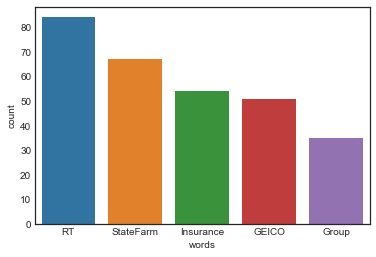

In [771]:
neut_words = Counter(" ".join(results_neutral['tweets'].apply(text_process)).split()).most_common(5)
neut_words = pd.DataFrame.from_records(neut_words, columns=['words','count' ])
print(neut_words)
sns.barplot(x='words',y='count',data=neut_words)

       words  count
0  insurance     31
1        car     26
2         RT     26
3  StateFarm     25
4         15     23


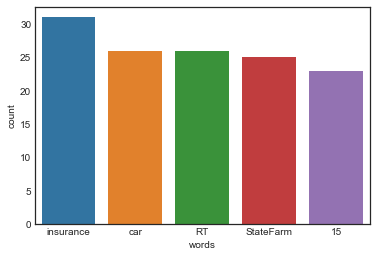

In [772]:
pos_words = Counter(" ".join(results_positive['tweets'].apply(text_process)).split()).most_common(5)
pos_words = pd.DataFrame.from_records(pos_words, columns=['words','count' ])
print(pos_words)
sns.barplot(x='words',y='count',data=pos_words)

In [773]:
# from wordcloud import WordCloud, STOPWORDS
# wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color='black',
#                       width=3000,
#                       height=2500
#                      ).generate(cwc)

## Preparing dataset for Machine Learning 

In [774]:
x = result_clean['tweets'].apply(str)

In [775]:
y = result_clean['sentiments'].apply(str)

Count Vectorizer converts a collection of words into number representations, example below

In [776]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
example = cv.fit_transform(["hi, me and you hi"])
print(example)

  (0, 3)	1
  (0, 0)	1
  (0, 2)	1
  (0, 1)	2


In [777]:
X = cv.fit_transform(x)

**This function will take punctuations and stopwords out of the tweets**

In [778]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = [c for c in nopunc.split() if c.lower() not in stopwords.words('english')]
    return nostop

**This method will split training and testing datasets**

In [779]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

# Multinomial Naive Bayes without Tfidf

**Multinomial Naive Bayes models the word counts and adjusts the formula to word counts. **

In [780]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

** Use X_train (70% of tweets) and y_train (70% of sentiment) to train the model**

In [781]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predict X_test (30% of the tweets) that were not used to train the model**

In [782]:
print(type(X_test))

<class 'scipy.sparse.csr.csr_matrix'>


In [783]:
predictions = nb.predict(X_test)

In [784]:
from sklearn.metrics import confusion_matrix,classification_report

In [785]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 0  0  1  0]
 [ 0 36  5 14]
 [ 0  4 60 10]
 [ 0  0  8 17]]


             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         1
   negative       0.90      0.65      0.76        55
    neutral       0.81      0.81      0.81        74
   positive       0.41      0.68      0.52        25

avg / total       0.77      0.73      0.74       155



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Multinomial Naive Bayes with pipeline of Count Vectorizer and Tfidf

**Create a pipeline**

Import Tfidf Transformer which counts words and weights their effects on the outcome 

Import stopwords, words that donot have any value example, is, he or has

Import Pipeline which create a pipeline for a dataset.

In [786]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

In [787]:
pipeline_MultinomialNB = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Define the tweets as 'X' and the sentiments as 'y' to split 

In [788]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

In [789]:
pipeline_MultinomialNB.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function removeit at 0x116f0e1e0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
   ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [790]:
predictions_MultinomialNB = pipeline_MultinomialNB.predict(X_test)

In [791]:
print(confusion_matrix(y_test,predictions_MultinomialNB))
print(classification_report(y_test,predictions_MultinomialNB))

[[ 0  0  1  0]
 [ 0 11 40  4]
 [ 0  1 68  5]
 [ 0  1 14 10]]
             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         1
   negative       0.85      0.20      0.32        55
    neutral       0.55      0.92      0.69        74
   positive       0.53      0.40      0.45        25

avg / total       0.65      0.57      0.52       155



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Classification Method 

In [792]:
from sklearn.ensemble import RandomForestClassifier

In [793]:
pipeline_RandomForestClassifier = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ using micro Decision Tree classifier
])

In [794]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [795]:
pipeline_RandomForestClassifier.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function removeit at 0x116f0e1e0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
   ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [796]:
predictions_RandomForestClassifier = pipeline_RandomForestClassifier.predict(X_test)

In [797]:
print(confusion_matrix(y_test,predictions_RandomForestClassifier))
print(classification_report(y_test,predictions_RandomForestClassifier))

[[ 1  0  0  0]
 [ 0 49  5  1]
 [ 0 16 50  8]
 [ 0  7  7 11]]
             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         1
   negative       0.68      0.89      0.77        55
    neutral       0.81      0.68      0.74        74
   positive       0.55      0.44      0.49        25

avg / total       0.72      0.72      0.71       155



# SVC

In [798]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
param_grid = {'C':[0.1, 1,10,50,70,100,1000], 'gamma':[1,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [799]:
pipeline_grid = Pipeline([
        ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', GridSearchCV(SVC(),param_grid)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [800]:
pipeline_grid.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function removeit at 0x116f0e1e0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
   ...005, 0.001, 0.0005, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0))])

In [801]:
predictions_grid = pipeline_grid.predict(X_test)

In [802]:
print(confusion_matrix(y_test,predictions_grid))
print('\n')
print(classification_report(y_test,predictions_grid))

[[ 1  0  0  0]
 [ 0 40 10  5]
 [ 0  5 63  6]
 [ 0  4 10 11]]


             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         1
   negative       0.82      0.73      0.77        55
    neutral       0.76      0.85      0.80        74
   positive       0.50      0.44      0.47        25

avg / total       0.74      0.74      0.74       155

